# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Advanced Topics in Data Science

## **Classifying Bird Sounds From Around the World**


**Harvard University**<br/>
**Spring 2024**<br/>
**Instructors**: Pavlos Protopapas<br/>
**Project Members**: Elianne Sacher, Shane Kissinger, and Oleg Pavliv

In [1]:
# RUN THIS CELL
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

In [2]:
# Import libraries
import requests
import zipfile
import io, os
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import sklearn as sk

from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten, Activation, BatchNormalization, Flatten, Dropout, GaussianNoise, RandomContrast, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from PIL import Image
from io import BytesIO

import warnings
# Suppress specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore")

2024-04-27 21:01:50.357914: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-27 21:01:50.404130: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 21:01:50.404164: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-27 21:01:50.405381: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-27 21:01:50.412558: I tensorflow/core/platform/cpu_feature_guar

## **Problem statement**

We aim to develop a machine-learning model that can accurately classify bird sounds based on their spectrograms. By leveraging audio, we aim to create a robust model that can identify bird families from their sounds and associated visual information. This project has the potential to contribute to biodiversity monitoring and conservation efforts by providing an automated tool for identifying bird species based on their vocalizations.

Our project is important because it contributes to biodiversity conservation by enabling accurate identification of bird families through their calls. This aids in ecological research, particularly in understanding bird populations and behaviors, which is crucial for habitat conservation and assessing the impact of climate change. Additionally, our work advances technology in bioacoustics, providing valuable tools for automated wildlife monitoring. By developing a model and dataset for bird call classification, we also support conservation policies and engage the public in citizen science initiatives, fostering a greater appreciation for nature and wildlife conservation.





<a id="contents"></a>

## **Notebook contents**

- [**Data Description**](#data)
  - [**Overview**](#data)
    - [**Multimedia Dataset**](#data)
    - [**Occurrence Dataset**](#data)
  - [**Why Use These Datasets**](#data)
  - [**Key Metrics**](#data)
  - [**Scope**](#data)
  - [**Methodology**](#data)
- [**Initial Inspection of Datasets**](#EDA)
  - [**Loading Dataset**](#load)
  - [**Quick Methods for Dataset Investigation**](#inv)
  - [**Summary of Dataset Analysis**](#sum_inv)
- [**Data Preprocessing**](#preproc)
- [**Data Analysis post-preprocessing**](#data_post)

<a id="data"></a>

## **Data Description**

### **Overview**
This project utilizes two datasets from the Xeno-canto Foundation for Nature Sounds, focusing on bird sounds from around the world.

#### **Multimedia Dataset (`df_multimedia`)**

This dataset contains multimedia information associated with the bird sound recordings in the Xeno-canto database. The fields in this dataset include:

- **gbifID**: The unique identifier for the occurrence associated with the multimedia.
- **type**: The type of multimedia, such as `StillImage` or `Sound`.
- **format**: The format of the multimedia file, such as `image/png` or `audio/mpeg`.
- **identifier**: The URL where the multimedia file can be accessed.
- **references**: Any references associated with the multimedia.
- **title**: The title of the multimedia file.
- **description**: A description of the multimedia content, such as "Oscillogram of the first ten seconds of the sound recording."
- **source**: The source of the multimedia file.
- **audience**: The intended audience for the multimedia.
- **created**: The date when the multimedia was created.
- **creator**: The creator of the multimedia file, typically the recordist or the organization.
- **contributor**: Any contributors to the multimedia file.
- **publisher**: The publisher of the multimedia file.
- **license**: The license under which the multimedia is shared.
- **rightsHolder**: The holder of the rights to the multimedia file.

#### **Occurrence Dataset (`df_occurrence`)**

This dataset contains occurrence records for bird sounds in the Xeno-canto database. The fields in this dataset include:

- **gbifID**: The unique identifier for the occurrence.
- **license**: The license under which the occurrence data is shared.
- **publisher**: The organization that published the occurrence data.
- **references**: A URL where more information about the occurrence can be found.
- **rightsHolder**: The holder of the rights to the occurrence data.
- **basisOfRecord**: The type of record, such as `HUMAN_OBSERVATION`.
- **occurrenceID**: A unique identifier for the occurrence within the dataset.
- **catalogNumber**: The catalog number of the occurrence.
- **recordedBy**: The person who recorded the occurrence.
- **behavior**: The behavior observed in the recording, such as "call."
- **eventDate**: The date when the recording was made.
- **continent**: The continent where the recording was made.
- **countryCode**: The ISO code of the country where the recording was made.
- **locality**: The specific location where the recording was made.
- **decimalLatitude** and **decimalLongitude**: The geographic coordinates of the recording location.
- **scientificName**: The scientific name of the bird species recorded.
- **taxonRank**: The taxonomic rank of the recorded species, such as `SPECIES`.
- **vernacularName**: The common name of the bird species recorded.
- **mediaType**: The types of media associated with the occurrence, such as `Sound` or `StillImage`.

### **Why Use These Datasets?**

We are using these two datasets to develop a machine-learning model that can classify bird sounds based on their taxonomic classification. The `df_multimedia` dataset provides access to audio and image data associated with the bird sounds, which can be used as input features for our model. The `df_occurrence` dataset contains metadata about the bird sound recordings, including the scientific name of the species recorded, the location and date of the recording, and other relevant information. By combining these datasets, we can create a robust model that leverages both audio and image data along with metadata to accurately classify bird sounds.

### **Key Metrics**
- **Occurrences**: 716,626
- **With Taxon Match**: 100%
- **With Coordinates**: 97%
- **With Year**: 98%
- **Georeferenced Records**: 698,405

### **Scope**
- **Temporal Scope**: 1900-current
- **Geographic Scope**: Global
- **Taxonomic Scope**: Birds, with taxonomy based on the IOC World Bird List

### **Methodology**
Identifications of sounds on recordings are subject to continuous review by the Xeno-canto community. Current identifications can be challenged or questioned, and only recordings with "not questioned" or "questioned and resolved"

<a id="EDA"></a>

## **Initial Inspection of Datasets**

<a id="load"></a>

### **Loading Dataset**

In [3]:
# Load the bird data
gbif_file = "gbif_file.zip"
if gbif_file not in os.listdir("./"):
  !wget -O ./gbif_file.zip https://api.gbif.org/v1/occurrence/download/request/0044592-240321170329656.zip
  !unzip ./gbif_file.zip

In [4]:
## Load and inspect the Multimedia dataset
df_multimedia = pd.read_csv("./multimedia.txt", delimiter="\t")
df_multimedia.head()

,gbifID,type,format,identifier,references,title,description,source,audience,created,creator,contributor,publisher,license,rightsHolder
0,2243549892,StillImage,image/png,https://xeno-canto.org/sounds/uploaded/OXSIOLJ...,NaN,NaN,Oscillogram of the first ten seconds of the so...,NaN,NaN,NaN,Stichting Xeno-canto voor Natuurgeluiden,NaN,NaN,http://creativecommons.org/licenses/by-nc-nd/2.5/,Stichting Xeno-canto voor Natuurgeluiden
1,2243549892,StillImage,image/png,https://xeno-canto.org/sounds/uploaded/OXSIOLJ...,NaN,NaN,Spectrogram of the first ten seconds of the so...,NaN,NaN,NaN,Stichting Xeno-canto voor Natuurgeluiden,NaN,NaN,http://creativecommons.org/licenses/by-nc-nd/2.5/,Stichting Xeno-canto voor Natuurgeluiden
2,2243549892,Sound,audio/mpeg,https://xeno-canto.org/sounds/uploaded/OXSIOLJ...,NaN,NaN,3 s,NaN,NaN,NaN,Myornis,NaN,NaN,http://creativecommons.org/licenses/by-nc-nd/2.5/,Myornis
3,2243549897,StillImage,image/png,https://xeno-canto.org/sounds/uploaded/RJNSQXB...,NaN,NaN,Spectrogram of the first ten seconds of the so...,NaN,NaN,NaN,Stichting Xeno-canto voor Natuurgeluiden,NaN,NaN,http://creativecommons.org/licenses/by-nc-nd/2.5/,Stichting Xeno-canto voor Natuurgeluiden
4,2243549897,StillImage,image/png,https://xeno-canto.org/sounds/uploaded/RJNSQXB...,NaN,NaN,Oscillogram of the first ten seconds of the so...,NaN,NaN,NaN,Stichting Xeno-canto voor Natuurgeluiden,NaN,NaN,http://creativecommons.org/licenses/by-nc-nd/2.5/,Stichting Xeno-canto voor Natuurgeluiden


In [5]:
# Load and inspect the Occurrence dataset
df_occurrence = pd.read_csv("./occurrence.txt", delimiter="\t", on_bad_lines="skip")
df_occurrence.head()

,gbifID,accessRights,bibliographicCitation,language,license,modified,publisher,references,rightsHolder,type,...,publishedByGbifRegion,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,iucnRedListCategory
0,2243621334,NaN,NaN,NaN,CC_BY_NC_4_0,NaN,Xeno-canto Foundation for Nature Sounds,https://data.biodiversitydata.nl/xeno-canto/ob...,Bob Planqué,NaN,...,EUROPE,ECU,Ecuador,ECU.3_1,Cañar,ECU.3.1_1,Azogues,ECU.3.1.6_1,Pindilig,LC
1,2243773710,NaN,NaN,NaN,CC_BY_NC_4_0,NaN,Xeno-canto Foundation for Nature Sounds,https://data.biodiversitydata.nl/xeno-canto/ob...,Bob Planqué,NaN,...,EUROPE,ECU,Ecuador,ECU.3_1,Cañar,ECU.3.1_1,Azogues,ECU.3.1.6_1,Pindilig,NaN
2,2243866773,NaN,NaN,NaN,CC_BY_NC_4_0,NaN,Xeno-canto Foundation for Nature Sounds,https://data.biodiversitydata.nl/xeno-canto/ob...,Bob Planqué,NaN,...,EUROPE,PER,Peru,PER.18_1,Madre de Dios,PER.18.3_1,Tambopata,PER.18.3.4_1,Tambopata,LC
3,2243875909,NaN,NaN,NaN,CC_BY_NC_4_0,NaN,Xeno-canto Foundation for Nature Sounds,https://data.biodiversitydata.nl/xeno-canto/ob...,Bob Planqué,NaN,...,EUROPE,PER,Peru,PER.18_1,Madre de Dios,PER.18.3_1,Tambopata,PER.18.3.4_1,Tambopata,LC
4,2243887248,NaN,NaN,NaN,CC_BY_NC_4_0,NaN,Xeno-canto Foundation for Nature Sounds,https://data.biodiversitydata.nl/xeno-canto/ob...,Bob Planqué,NaN,...,EUROPE,PER,Peru,PER.18_1,Madre de Dios,PER.18.3_1,Tambopata,PER.18.3.4_1,Tambopata,NaN


<a id="inv"></a>

### **Quick Methods for Dataset Investigation**

In [6]:
# Data Description
## Multimedia Dataset
print("Multimedia Dataset Description:")
print(df_multimedia.info())

print("\n###################################################\n")

## Occurrence Dataset
print("Occurrence Dataset Description:")
print(df_occurrence.info())

Multimedia Dataset Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149878 entries, 0 to 2149877
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   gbifID        int64  
 1   type          object 
 2   format        object 
 3   identifier    object 
 4   references    float64
 5   title         float64
 6   description   object 
 7   source        float64
 8   audience      float64
 9   created       float64
 10  creator       object 
 11  contributor   float64
 12  publisher     float64
 13  license       object 
 14  rightsHolder  object 
dtypes: float64(7), int64(1), object(7)
memory usage: 246.0+ MB
None

###################################################

Occurrence Dataset Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716563 entries, 0 to 716562
Columns: 223 entries, gbifID to iucnRedListCategory
dtypes: bool(3), float64(151), int64(5), object(64)
memory usage: 1.2+ GB
None


In [7]:
# Summary of the Data
## Shape of the Data
print("Shape of Multimedia Dataset:", df_multimedia.shape)
print("Shape of Occurrence Dataset:", df_occurrence.shape)

Shape of Multimedia Dataset: (2149878, 15)
Shape of Occurrence Dataset: (716563, 223)


In [8]:
## Data Types
print("Data Types in Multimedia Dataset:\n", df_multimedia.dtypes)

print("\n###################################################\n")

print("Data Types in Occurrence Dataset:\n", df_occurrence.dtypes)

Data Types in Multimedia Dataset:
 gbifID            int64
type             object
format           object
identifier       object
references      float64
title           float64
description      object
source          float64
audience        float64
created         float64
creator          object
contributor     float64
publisher       float64
license          object
rightsHolder     object
dtype: object

###################################################

Data Types in Occurrence Dataset:
 gbifID                     int64
accessRights             float64
bibliographicCitation    float64
language                 float64
license                   object
                          ...   
level2Gid                 object
level2Name                object
level3Gid                 object
level3Name                object
iucnRedListCategory       object
Length: 223, dtype: object


In [9]:
## Descriptive Statistics
print("Descriptive Statistics for Multimedia Dataset:\n", df_multimedia.describe())

print("\n###################################################\n")

print("Descriptive Statistics for Occurrence Dataset:\n", df_occurrence.describe())

Descriptive Statistics for Multimedia Dataset:
              gbifID  references  title  source  audience  created  \
count  2.149878e+06         0.0    0.0     0.0       0.0      0.0   
mean   2.838064e+09         NaN    NaN     NaN       NaN      NaN   
std    7.251428e+08         NaN    NaN     NaN       NaN      NaN   
min    2.243550e+09         NaN    NaN     NaN       NaN      NaN   
25%    2.243744e+09         NaN    NaN     NaN       NaN      NaN   
50%    2.432440e+09         NaN    NaN     NaN       NaN      NaN   
75%    3.353659e+09         NaN    NaN     NaN       NaN      NaN   
max    4.538110e+09         NaN    NaN     NaN       NaN      NaN   

       contributor  publisher  
count          0.0        0.0  
mean           NaN        NaN  
std            NaN        NaN  
min            NaN        NaN  
25%            NaN        NaN  
50%            NaN        NaN  
75%            NaN        NaN  
max            NaN        NaN  

#########################################

In [9]:
## Check for NaN values
print("NaN values in Multimedia Dataset:\n", df_multimedia.isna().sum())

print("\n###################################################\n")

print("NaN values in Occurrence Dataset:\n")
for col in df_occurrence.columns:
    print(f"{col}          {df_occurrence[col].isna().sum()}")

NaN values in Multimedia Dataset:
 gbifID                0
type                  0
format                0
identifier            0
references      2149878
title           2149878
description          99
source          2149878
audience        2149878
created         2149878
creator               0
contributor     2149878
publisher       2149878
license               0
rightsHolder          0
dtype: int64

###################################################

NaN values in Occurrence Dataset:

gbifID          0
accessRights          716563
bibliographicCitation          716563
language          716563
license          0
modified          716563
publisher          0
references          0
rightsHolder          0
type          716563
institutionID          716563
collectionID          716563
datasetID          716563
institutionCode          716563
collectionCode          0
datasetName          716563
ownerInstitutionCode          716563
basisOfRecord          0
informationWithheld         

In [10]:
# Count occurrences of "Oscillogram" and "Spectrogram" in the description column
osc_count = df_multimedia['description'].fillna('').str.contains("Oscillogram").sum()
spect_count = df_multimedia['description'].fillna('').str.contains("Spectrogram").sum()
sound_count = df_multimedia['type'].fillna('').str.contains("Sound").sum()

# Print results
print(f"Total number of gbifID in Multimedia dataset: {len(set(df_occurrence['gbifID']))}")
print(f"Occurrences of 'Oscillogram' type data: {osc_count}")
print(f"Occurrences of 'Spectrogram' type data: {spect_count}")
print(f"Occurrences of 'Sound' type data: {sound_count}")

# Check that these numbers match with occurrences in the Occurrence dataset
print(f'Total number of gbifID in Occurrence dataset: {len(set(df_occurrence["gbifID"]))}')

Total number of gbifID in Multimedia dataset: 716563
Occurrences of 'Oscillogram' type data: 716626
Occurrences of 'Spectrogram' type data: 716626
Occurrences of 'Sound' type data: 716626
Total number of gbifID in Occurrence dataset: 716563


<a id="dum_inv"></a>

### **Summary of Dataset Analysis**

#### **Multimedia Dataset:**
- Contains 2,149,878 entries and 15 columns.
- Columns `references`, `title`, `source`, `audience`, `created`, `contributor`, and `publisher` are entirely NaN (missing values).
- The `description` column has 99 missing values.
- Counts for 'Oscillogram' and 'Spectrogram' type data are equal (716,626) and match the total number of 'Sound' type data.

#### **Occurrence Dataset:**
- Contains 716,563 entries and 223 columns.
- Many columns have a significant number of NaN values, with some columns being entirely NaN.
- Descriptive statistics are available for numerical columns, but the dataset's complexity requires careful handling of missing values.

#### **Analysis Insights:**
- There is a high degree of missing data in several columns of the Multimedia dataset, which requires data cleaning.
- The Occurrence dataset is large and complex, necessitating imputation or exclusion of certain features for analysis.
- The near-exact match between the number of unique `gbifID` in the Occurrence dataset and the counts of 'Oscillogram', 'Spectrogram', and 'Sound' type data in the Multimedia dataset suggests a strong correspondence between occurrences and their multimedia records. However, there are 63 more multimedia records than unique `gbifID`, indicating some missing occurrences. These samples with missing occurrences can be discarded as they are not critical to the analysis.

<a id="preproc"></a>

## **Data Preprocessing**

In [12]:
# Filter for Spectrogram data
df_multimedia_spectrogram = df_multimedia[df_multimedia['description'].fillna('').str.contains("Spectrogram")]


# Merge relevant columns from Occurrence dataset with Multimedia dataset
columns_to_be_merged = [
    "gbifID", "behavior", "continent", "countryCode", "family", "species"
]

df_merged = pd.merge(df_occurrence[columns_to_be_merged], df_multimedia_spectrogram, on="gbifID")

# Drop unnecessary columns
columns_to_drop = [
    "title", "publisher", "description", "source", "audience",
    "creator", "contributor", "license", "rightsHolder",
    "created", "format", "type", "references"
]

df_merged_clean = df_merged.drop(columns_to_drop, axis=1)

# Drop rows with missing 'identifier' values
df_merged_clean = df_merged_clean.dropna(subset=['identifier'])

# Filter for Call behavior
df_merged_clean = df_merged_clean[df_merged_clean['behavior'] == "call"]

# Drop behavior column
df_merged_clean = df_merged_clean.drop(['behavior'], axis=1)

# Display df
df_merged_clean.head()

,gbifID,continent,countryCode,family,species,identifier
0,2243621334,SOUTH_AMERICA,EC,Turdidae,Turdus fuscater,https://xeno-canto.org/sounds/uploaded/OH38YHK...
1,2243773710,SOUTH_AMERICA,EC,Parulidae,Myiothlypis coronata,https://xeno-canto.org/sounds/uploaded/OH38YHK...
6,2243592931,SOUTH_AMERICA,PE,Grallariidae,Grallaria quitensis,https://xeno-canto.org/sounds/uploaded/AEFZWKW...
31,2243580386,SOUTH_AMERICA,PE,Cardinalidae,Habia rubica,https://xeno-canto.org/sounds/uploaded/OH38YHK...
42,2243729480,NORTH_AMERICA,PA,Troglodytidae,Cantorchilus thoracicus,https://xeno-canto.org/sounds/uploaded/MCNTDLD...


**Above, we are doing the following:**

- We are keeping only the spectrogram data from the Multimedia dataset because we are initially focusing on training our model using the image of the spectrogram. Spectrograms provide a visual representation of the frequency spectrum of sounds, which is useful for identifying bird species based on their vocalizations.
- We are merging relevant columns from the Occurrence dataset with the Multimedia dataset to create a single dataset that includes both the metadata about the bird sounds (e.g., species, behavior, geographical information) and the associated spectrogram images. This merged dataset will be used for training and testing our machine-learning model.
- We are dropping columns that are not relevant to our analysis, such as `title`, `publisher`, `description`, etc. These columns do not provide useful information for the classification of bird sounds and can be removed to simplify the dataset.
- We are dropping rows with missing 'identifier' values because these rows do not have a corresponding spectrogram image. Since our model relies on the spectrogram images for training, samples without images cannot be used. There are not many samples like this, so removing them is not expected to significantly impact the performance of our model.
- We are keeping only the 'call' behavior from the dataset because we are focusing on training our model to these types of sounds. Given that the calls are shorter and the spectrogram provided is limited to only the first 10 seconds, we believe that 'call' type behaviors will capture the calls more completely. Then, we drop that column given that we already filtered according to it.

**Before proceeding to our base-line model, we would like to look at the missing values once more and decide what the final predictors we would like to include in our dataset:**

In [13]:
# Find the best response class
print(df_merged_clean.describe())
print(df_merged_clean.family.describe())
print(df_merged_clean.species.describe())

# Print missing values
print(f"Missing 'family' values: {df_merged_clean.family.isna().sum()}")

             gbifID
count  2.090320e+05
mean   2.772183e+09
std    7.128529e+08
min    2.243550e+09
25%    2.243718e+09
50%    2.243887e+09
75%    3.076293e+09
max    4.538110e+09
count         205478
unique           237
top       Tyrannidae
freq           11200
Name: family, dtype: object
count          205268
unique           9177
top       Parus major
freq             2856
Name: species, dtype: object
Missing 'family' values: 3554


**Based on the above**, we can see that family appears in the majority of the rows and that the number of families is significantly smaller than the number of species, so we decided to focus on predicting the family rather than the specific species under the assumption that species from the same family will have similar 'call' sounds. This should significantly increase the accuracy of our model given that there would be more samples per family.

**Bellow**, we will adjust the dataset accordingly.

In [14]:
# Adjust for 'family' as the predicted variable
# df_merged_clean = df_merged_clean.drop(['species'], axis=1)
# df_merged_clean = df_merged_clean.dropna(subset=['family'])
df_merged_clean = df_merged_clean.drop(['family'], axis=1)
df_merged_clean = df_merged_clean.dropna(subset=['species'])

**We also wanted to investigate the distribution of families before proceeding:**

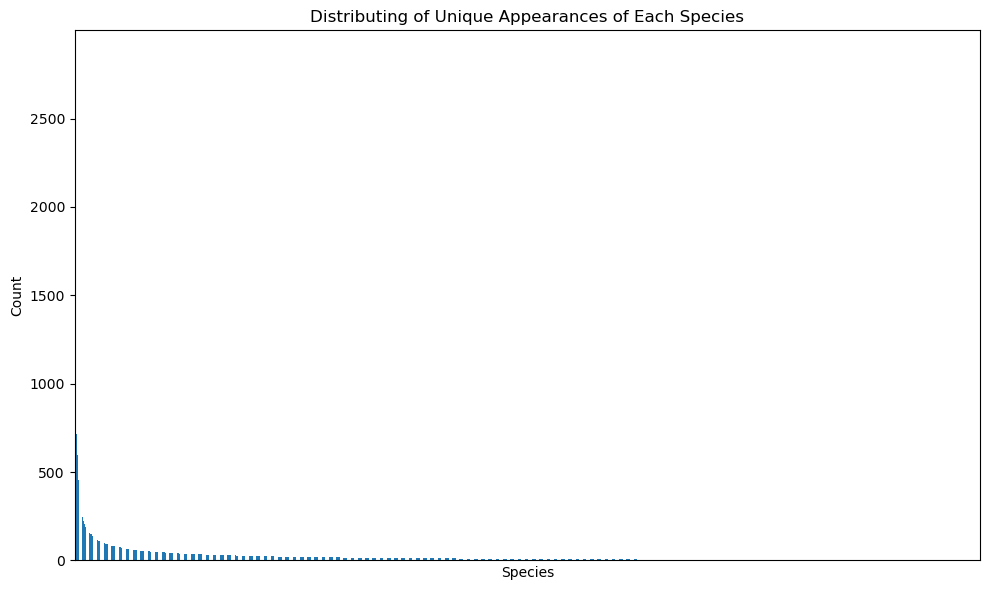

In [15]:
# Count the occurrences of each family
# family_counts = df_merged_clean['family'].value_counts()
species_counts = df_merged_clean['species'].value_counts()
# Plotting
plt.figure(figsize=(10, 6))
species_counts.plot(kind='bar')
plt.title('Distributing of Unique Appearances of Each Species')
plt.xlabel('Species')
plt.xticks([])
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

When we download the audio files, we will only select the 10 most common species, so that we won't have class imbalances.

<a id="data_post"></a>

## **Data Analysis post-preprocessing**

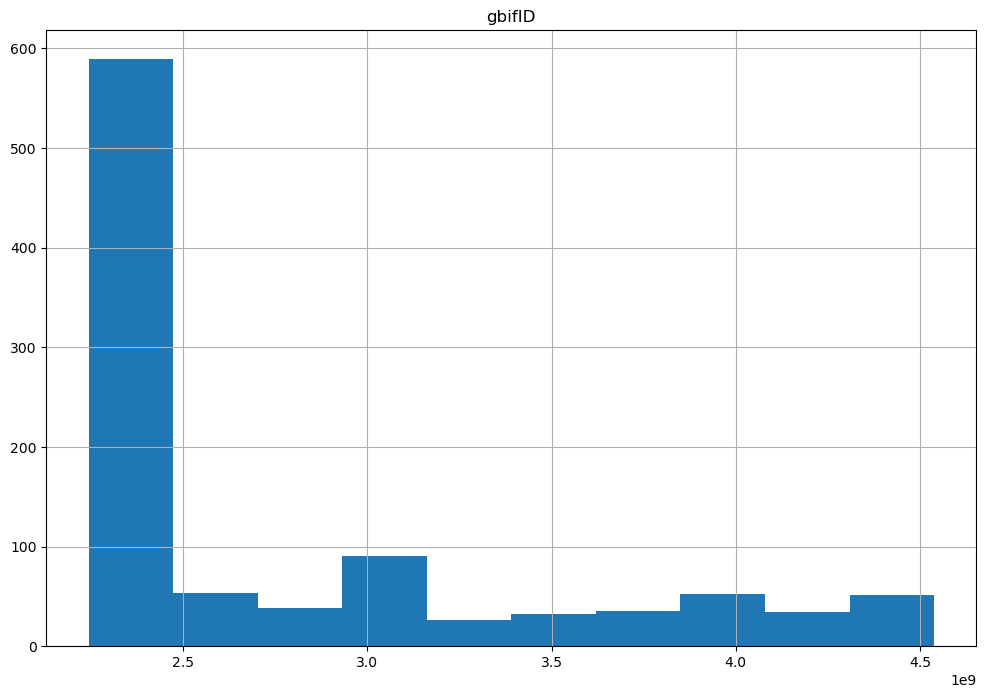

In [20]:
# Histograms for each feature
sampled_df.hist(figsize=(12, 8))
plt.show()

In [21]:
# Check our processed data
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gbifID       1000 non-null   int64 
 1   continent    989 non-null    object
 2   countryCode  998 non-null    object
 3   species      1000 non-null   object
 4   image        1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


Since we are aiming to only use the image of the spectrogram to predict the family and not use the geographic details unless our model underperforms, we don't mind for now that some of the continents and countryCodes are missing for some of our samples.

**Some more analysis of the new data:**

To create our pickle dataset, we started by collecting bird spectrogram images from various online sources, ensuring a diverse representation of bird families. We then preprocessed these images by resizing them to a uniform dimension, converting them to grayscale, and applying other image enhancement techniques to optimize them for analysis. Each image was labeled with the corresponding bird family name, allowing us to map the visual data to specific categories. We structured our dataset by separating the features (X), which are the processed images, from the labels (y), which denote the bird families. Additionally, we included metadata such as gbifIDs, and unique identifiers for each bird species, to enrich our dataset and facilitate further analysis. This meticulous process of data collection, preprocessing, and labeling culminated in the creation of a comprehensive dataset, which we then serialized into a pickle file for convenient storage and access in our machine-learning workflows.

In [22]:
# Load the dataset from a pickle file
with open('dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

We utilized the merged and cleaned dataset created by you and Oleg, randomized the rows, and downloaded the first 2000 spectrogram images. Due to some download failures, the final count was slightly less than 2000. We organized the data into a dictionary, with 'X' representing the images, 'Y' indicating the family labels, 'gbifID' storing the unique identifiers for each spectrogram, and 'labels' mapping indices to family names. We then serialized this dataset into a pickle file using `pickle.dump` for easy loading into different notebooks.

In a subsequent notebook, we flattened each image to perform Principal Component Analysis (PCA) and plotted the first two principal components. However, the plot revealed that the families were closely clustered with a few outliers, and the high number of classes (over 200) made the color coding less informative.

Lastly, we created a histogram of the sample to check for any significant biases and ensure a fair representation of the data.

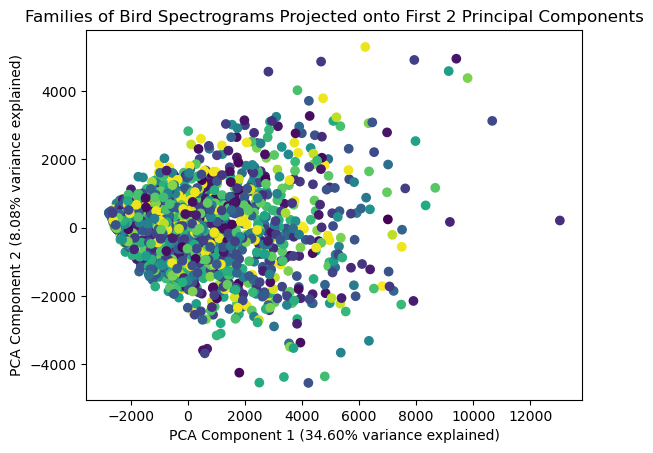

In [23]:
# Extract features (X), labels (y), unique identifiers (gbifIDs), and label mapping (idx2labels) from the dataset
X, y, gbifIDs, idx2labels = dataset["X"], dataset["Y"], dataset["gbifID"], dataset["labels"]

# PCA plot to visualize potential natural groupings in the data
# Reshape the spectrogram data to a 2D array suitable for PCA
X_reshaped = np.reshape(X, (X.shape[0], 81 * 240))

# Perform PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2).fit(X_reshaped)
family_PCA = pca.transform(X_reshaped)

# Plot the first two principal components, coloring points by their labels (bird families)
plt.scatter(family_PCA[:, 0], family_PCA[:, 1], c=y)
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance explained)')
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance explained)')
plt.title('Families of Bird Spectrograms Projected onto First 2 Principal Components')
plt.show()

The PCA plot appears uninformative due to the lack of discernible groupings. However, this might not accurately reflect the true structure of the data, as we are compressing high-dimensional information into just two dimensions. Consequently, potential groupings might exist, but they are not visible in this 2D representation. Additionally, the plot's utility is further diminished by the sheer number of classes, making it impossible to include a comprehensive legend or distinguish between colors effectively.